# Clustering Results Exploration Notebook
Christopher Marais

gmarais@ufl.edu

2023/12/14

<br>

The aim of this notebook is to describe how well the clustering alligns with other labels given to the data. 

The Runtime of this notebook is less than 5 minutes.

<br>

Input: `/02_Clean_data/02_recording_event_times_labels_binary_clustered.csv` 

↓

Process: `</03_Scripts/Result_Exploration.ipynb>`

↓

Output: `/04_Visualizations/03_attribute_NMI_plot.png`, `/04_Visualizations/03_attribute_ARI_plot.png`, `/02_Clean_data/03_cluster_relation_df.csv`

<br>

-----------

### Import Packages

In [15]:
import os
import numpy as np
import pandas as pd # use pandas for more functionality
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import seaborn as sns
import matplotlib.pyplot as plt

### Define Working Directory

In [16]:
# get working directory as paerent directory of current directory
cwd = os.getcwd()
pwd = os.path.dirname(cwd)

### Import Data

In [17]:
# import clustered data
data_df = pd.read_csv(pwd + "/02_Clean_data/02_recording_event_times_labels_binary_clustered.csv")
data_df['order'] = data_df['order'].fillna('exposure Nan')
data_df

,order,start_time,end_time,collection_key,subject,behavior_label,units,event_timestamps,cluster
0,exposure Nan,15167.0,24733.0,20230803_101331_1_merged.rec,1.1,acquisition,2,"[133.0, 359.0, 761.0, 841.0, 1042.0, 1142.0, 1...",63
1,exposure Nan,15167.0,24733.0,20230803_101331_1_merged.rec,1.1,acquisition,26,"[149.0, 2407.0, 2955.0, 6394.0, 6924.0, 11713....",8
2,exposure Nan,15167.0,24733.0,20230803_101331_1_merged.rec,1.1,acquisition,196,"[394.0, 1740.0, 2021.0, 2752.0, 3636.0, 5356.0...",61
3,exposure Nan,15167.0,24733.0,20230803_101331_1_merged.rec,1.1,acquisition,113,"[436.0, 7630.0, 9762.0, 11461.0, 13316.0, 1414...",38
4,exposure Nan,15167.0,24733.0,20230803_101331_1_merged.rec,1.1,acquisition,91,"[449.0, 4067.0, 11824.0, 22087.0]",33
...,...,...,...,...,...,...,...,...,...
25593,exposure 3,1985700.0,1986200.0,20230818_133620_1_merged.rec,1.4,novel,73,[],27
25594,exposure 3,1985700.0,1986200.0,20230818_133620_1_merged.rec,1.4,novel,141,[],27
25595,exposure 3,1985700.0,1986200.0,20230818_133620_1_merged.rec,1.4,novel,36,[],27
25596,exposure 3,1985700.0,1986200.0,20230818_133620_1_merged.rec,1.4,novel,95,[],27


### Calculate Adjusted Rand Score (ARI) and Normalized Mutual Information Score (NMI) 

In [18]:
# calculate adjusted rand score and normalized mutual info score
attribute_lst = ['behavior_label', 'order', 'subject', 'collection_key', 'units']
cluster_relation_df = pd.DataFrame()
ari_lst = []
nmi_lst = []
for attribute_name in attribute_lst:
    print(attribute_name)
    ari_lst.append(adjusted_rand_score(labels_true=data_df[attribute_name], labels_pred=data_df['cluster']))
    nmi_lst.append(normalized_mutual_info_score(labels_true=data_df[attribute_name], labels_pred=data_df['cluster']))
cluster_relation_df['attribute'] = attribute_lst
cluster_relation_df['ari'] = ari_lst
cluster_relation_df['nmi'] = nmi_lst

behavior_label
order
subject
collection_key
units


c:\Users\gcmar\anaconda3\envs\play\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\gcmar\anaconda3\envs\play\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


In [19]:
# save data to csv again
cluster_relation_df.to_csv(pwd + "/02_Clean_data/03_cluster_relation_df.csv", index=False)

# show table
cluster_relation_df

,attribute,ari,nmi
0,behavior_label,-0.003744,0.004630
1,order,-0.003684,0.004507
2,subject,0.001429,0.010686
3,collection_key,-0.000453,0.018753
4,units,0.003426,0.115272


### Visualize Results

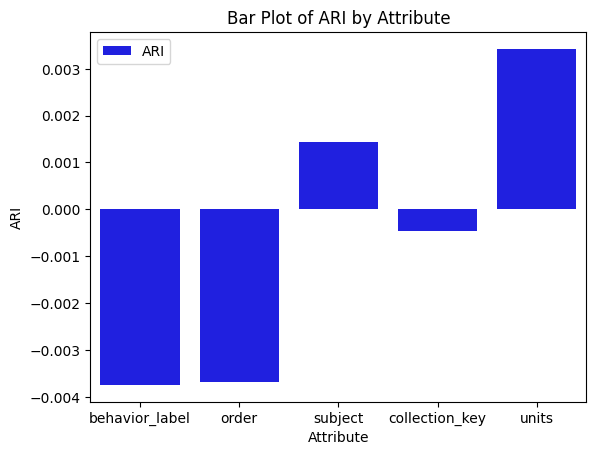

In [20]:
# Create a bar plot using Seaborn
sns.barplot(cluster_relation_df, x='attribute', y='ari', color='blue', label='ARI')

# Modify the plot
plt.title('Bar Plot of ARI by Attribute')  # Adding a title
plt.xlabel('Attribute')  # X-axis label
plt.ylabel('ARI')  # Y-axis label

# Save the plot
plt.savefig(pwd + "/04_Visualizations/03_attribute_ARI_plot.png")

# Show the plot
plt.show()

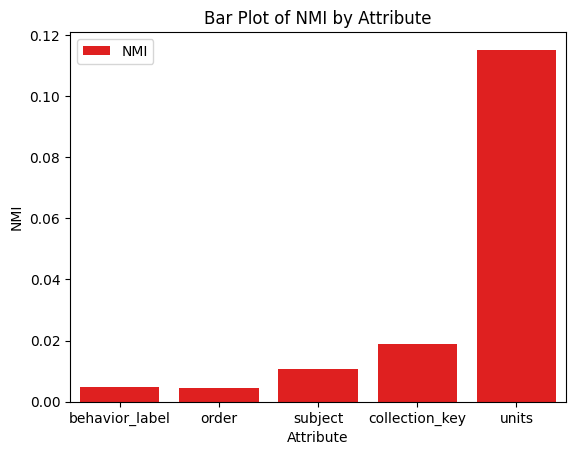

In [21]:
# Create a bar plot using Seaborn
sns.barplot(cluster_relation_df, x='attribute', y='nmi', color='red', label='NMI')

# Modify the plot
plt.title('Bar Plot of NMI by Attribute')  # Adding a title
plt.xlabel('Attribute')  # X-axis label
plt.ylabel('NMI')  # Y-axis label

# Save the plot
plt.savefig(pwd + "/04_Visualizations/03_attribute_NMI_plot.png")

# Show the plot
plt.show()